## Problem 1
Please extend the code to compute:

1). The gradient of hinge loss when label = 1.0, x = 1.001 
2). The gradient of hinge loss when label = 1.0, x = 0.009
3). Plot the curves of gradients and losses for x in [-2, 2] 

hint: in machine learning, the hinge loss is a loss function used for training classifiers. The hinge loss is used for "maximum-margin" classification, most notably for support vector machines (SVMs)

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

/Users/cengjianhuan/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/Users/cengjianhuan/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [43]:
label = tf.constant(1.0, dtype=tf.float32)
x = tf.placeholder(tf.float32)

loss_hin = tf.losses.hinge_loss(label, x)
gradient_hin = tf.gradients(loss_hin, x)

In [7]:
# 1). The gradient of hinge loss when label = 1.0, x = 1.001
# 2). The gradient of hinge loss when label = 1.0, x = 0.009
with tf.Session() as sess:
    ci, gi = sess.run((loss_hin, gradient_hin), feed_dict={x: 1.001})
    print('Q1.1 x = 1.001 : hinge_loss, grad = ', ci, gi)
    ci, gi = sess.run((loss_hin, gradient_hin), feed_dict={x: 0.009})
    print('Q1.2 x = 0.009 : hinge_loss, grad = ', ci, gi)

Q1.1 x = 1.001 : hinge_loss, grad =  0.0 [-0.0]
Q1.2 x = 0.009 : hinge_loss, grad =  0.991 [-1.0]


Text(0.5,0,'x')

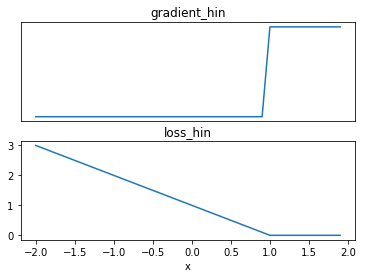

In [50]:
# 3). Plot the curves of gradients and losses for x in [-2, 2]
with tf.Session() as sess:
    c=[]
    g=[]
    x_range=np.arange(-2,2,0.1)
    for i in x_range:
        ci, gi = sess.run((loss_hin, gradient_hin), feed_dict={x: i})
        c.append(ci)
        g.append(gi)
        
# 3). Plot the curves of gradients and losses for x in [-2, 2]
plt.subplot(2,1,1)
plt.plot(x_range,g)
plt.title('gradient_hin')
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.plot(x_range,c)
plt.title('loss_hin')
plt.xlabel('x')

## Problem 2
import numpy
xs = np.array([[-1.1, 1.0], [-1.0, 1.1], [-1.1, 1.1], [1.0, -1.1],[1.1, -1.0],[1.0, -1.0],
                  [1.1, 1.1],[1.0, 0.9],[1.1, 1.0],  [-1.1, -1.0], [-1.1, -1.1], [-1.0, -1.1]],
                dtype=np.float32)
ys = np.array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0], dtype=np.float32)
ys = ys[:, None]

In [3]:
xs = np.array([[-1.1, 1.0], [-1.0, 1.1], [-1.1, 1.1], [1.0, -1.1],[1.1, -1.0],[1.0, -1.0],
                  [1.1, 1.1],[1.0, 0.9],[1.1, 1.0],  [-1.1, -1.0], [-1.1, -1.1], [-1.0, -1.1]],
                dtype=np.float32)
ys = np.array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0], dtype=np.float32)
ys = ys[:, None]

In [4]:
from sklearn.cross_validation import train_test_split
X_tr, X_ts, y_tr, y_ts = train_test_split(xs,ys)

/Users/cengjianhuan/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Logistic regression

In [7]:
# train model
model1 = keras.Sequential([keras.layers.Dense(1, input_dim=2,activation='sigmoid')])
model1.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])
model1.fit(X_tr,y_tr,epochs=20)

Epoch 1/20
9/9 [==============================] - 0s 18ms/step - loss: 1.0396 - acc: 0.4444
Epoch 2/20
9/9 [==============================] - 0s 178us/step - loss: 1.0379 - acc: 0.4444
Epoch 3/20
9/9 [==============================] - 0s 225us/step - loss: 1.0362 - acc: 0.4444
Epoch 4/20
9/9 [==============================] - 0s 171us/step - loss: 1.0345 - acc: 0.4444
Epoch 5/20
9/9 [==============================] - 0s 234us/step - loss: 1.0328 - acc: 0.4444
Epoch 6/20
9/9 [==============================] - 0s 200us/step - loss: 1.0312 - acc: 0.4444
Epoch 7/20
9/9 [==============================] - 0s 252us/step - loss: 1.0295 - acc: 0.4444
Epoch 8/20
9/9 [==============================] - 0s 188us/step - loss: 1.0278 - acc: 0.4444
Epoch 9/20
9/9 [==============================] - 0s 182us/step - loss: 1.0261 - acc: 0.4444
Epoch 10/20
9/9 [==============================] - 0s 219us/step - loss: 1.0245 - acc: 0.4444
Epoch 11/20
9/9 [==============================] - 0s 262us/step - los

In [8]:
# test model
test1_loss, test1_acc = model1.evaluate(X_ts, y_ts)
print(test1_loss, test1_acc)

3/3 [==============================] - 0s 12ms/step
0.5592702031135559 0.6666666865348816


### multi-layer perceptrons (MLPs)

In [27]:
# 2 hidden layers
model2 = keras.Sequential([keras.layers.Dense(10, activation=tf.nn.relu), 
                           keras.layers.Dense(4, activation=tf.nn.relu), 
                           keras.layers.Dense(1, activation=tf.nn.sigmoid)])
model2.compile(optimizer=tf.train.AdamOptimizer(),loss='binary_crossentropy',metrics=['accuracy'])
model2.fit(X_tr,y_tr,epochs=20)

Epoch 1/20
9/9 [==============================] - 0s 42ms/step - loss: 0.6042 - acc: 1.0000
Epoch 2/20
9/9 [==============================] - 0s 171us/step - loss: 0.6021 - acc: 1.0000
Epoch 3/20
9/9 [==============================] - 0s 220us/step - loss: 0.5999 - acc: 1.0000
Epoch 4/20
9/9 [==============================] - 0s 233us/step - loss: 0.5977 - acc: 1.0000
Epoch 5/20
9/9 [==============================] - 0s 203us/step - loss: 0.5956 - acc: 1.0000
Epoch 6/20
9/9 [==============================] - 0s 313us/step - loss: 0.5934 - acc: 1.0000
Epoch 7/20
9/9 [==============================] - 0s 211us/step - loss: 0.5913 - acc: 1.0000
Epoch 8/20
9/9 [==============================] - 0s 237us/step - loss: 0.5892 - acc: 1.0000
Epoch 9/20
9/9 [==============================] - 0s 332us/step - loss: 0.5875 - acc: 1.0000
Epoch 10/20
9/9 [==============================] - 0s 215us/step - loss: 0.5859 - acc: 1.0000
Epoch 11/20
9/9 [==============================] - 0s 327us/step - los

In [28]:
test2_loss, test2_acc = model2.evaluate(X_ts, y_ts)
print(test2_loss, test2_acc)

3/3 [==============================] - 0s 32ms/step
0.5945124626159668 1.0


### compare

Text(0.5,1,'')

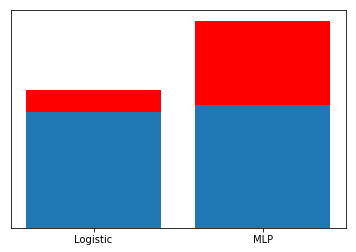

In [31]:
plt.xticks([])
plt.yticks([])
plt.bar(range(2),[test1_acc, test2_acc], color='red')
plt.bar(range(2),[test1_loss, test2_loss],tick_label=['Logistic','MLP'])
plt.title('')

In [32]:
test1_loss-test2_loss

-0.03524225950241089

In [33]:
test1_acc-test2_acc

-0.3333333134651184

# Problem 3
The original MNIST data has 10 categories. Our new task is to take only two categories: digit 4 and digit 8 and train a classifier. You are suggested to compare two models:

One hidden layer MLP with cross entropy loss
One hidden layer MLP with hinge loss
(bonus) MLP with two and three hidden layers

In [36]:
# load data 
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [37]:
# pick data with label 4 or label 8
cond0=np.logical_or(y_train==4,y_train==8)
X_tr = X_train[np.where(cond0)[0],:]
y_tr=y_train[np.where(cond0)]

cond1=np.logical_or(y_test==4,y_test==8)
X_ts = X_test[np.where(cond1)[0],:]
y_ts=y_test[np.where(cond1)]

In [14]:
# check labels
print(y_tr)
print(y_ts)

[4 4 8 ... 8 8 8]
[4 4 4 ... 4 8 4]


### process data

In [38]:
# 'Change the type of xs to float32'
tf.cast(X_tr, tf.float32)
tf.cast(X_ts, tf.float32)

<tf.Tensor 'Cast_1:0' shape=(1956, 28, 28) dtype=float32>

In [39]:
# 'Every pixel is from 0 to 255. Renormalize it to 0 and 1'
X_tr = X_tr/255.0 # why not 256
X_ts = X_ts/255.0

In [40]:
# Reshape the label vectors ys if necessary
y_tr = [0 if y_tr[i]==4 else 1 for i in range(len(y_tr))]
y_ts = [0 if y_ts[i]==4 else 1 for i in range(len(y_ts))]

print(y_tr[:3])
print(y_ts[:3])
print(len(y_tr),len(y_ts))
#tmp.index(8)

[0, 0, 1]
[0, 0, 0]
11693 1956


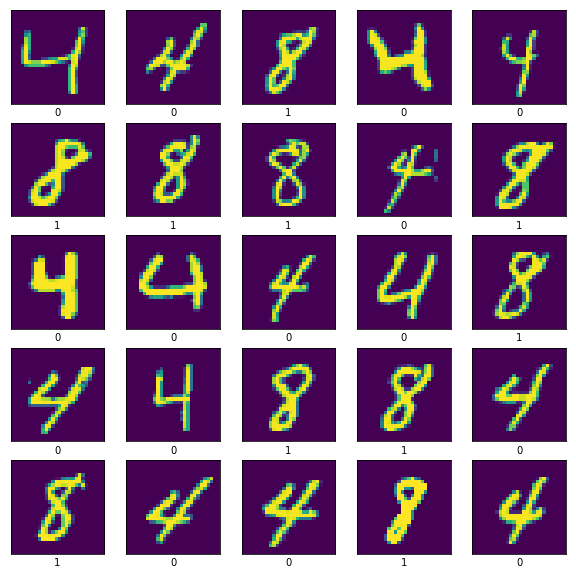

In [30]:
# explore data
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_tr[i])
    plt.xlabel(y_tr[i])
plt.show()

### train data 

In [18]:
# build model
# one layer is to reshape the digit pictures ( each with 28x28 pixels) to vectors of 784
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)), keras.layers.Dense(128, activation=tf.nn.relu),keras.layers.Dense(2,activation=tf.nn.softmax)])

In [19]:
# 3.1 One hidden layer MLP with cross entropy loss
print("############## train data with cross entropy loss #################")
model.compile(optimizer=tf.train.AdamOptimizer(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_tr, y_tr, epochs=10, batch_size=300, verbose=2)
print("############## test data with cross entropy loss ##################")
test_loss, test_acc = model.evaluate(X_ts,y_ts)
print(test_loss, test_acc)

############## train data with cross entropy loss #################
Epoch 1/10
 - 1s - loss: 0.1331 - acc: 0.9589
Epoch 2/10
 - 0s - loss: 0.0271 - acc: 0.9913
Epoch 3/10
 - 0s - loss: 0.0194 - acc: 0.9939
Epoch 4/10
 - 0s - loss: 0.0158 - acc: 0.9954
Epoch 5/10
 - 0s - loss: 0.0128 - acc: 0.9962
Epoch 6/10
 - 0s - loss: 0.0113 - acc: 0.9968
Epoch 7/10
 - 0s - loss: 0.0087 - acc: 0.9976
Epoch 8/10
 - 0s - loss: 0.0072 - acc: 0.9981
Epoch 9/10
 - 0s - loss: 0.0061 - acc: 0.9984
Epoch 10/10
 - 0s - loss: 0.0054 - acc: 0.9987
############## test data with cross entropy loss ##################
1956/1956 [==============================] - 0s 63us/step
0.012796560327046558 0.9948875255623721


In [20]:
# 3.2 One hidden layer MLP with hinge loss
import keras
from keras.utils import np_utils
y_tr = np_utils.to_categorical(y_tr)
y_ts = np_utils.to_categorical(y_ts)

print("############## train data with hinge loss #################")
model.compile(optimizer=tf.train.AdamOptimizer(), loss='categorical_hinge', metrics=['accuracy'])
model.fit(X_tr, y_tr, epochs=10, batch_size=300, verbose=2)

print("############## test data with hinge loss ##################")
test_loss, test_acc = model.evaluate(X_ts,y_ts)
print(test_loss, test_acc)

Using TensorFlow backend.


############## train data with hinge loss #################
Epoch 1/10
 - 1s - loss: 0.0073 - acc: 0.9984
Epoch 2/10
 - 0s - loss: 0.0049 - acc: 0.9991
Epoch 3/10
 - 0s - loss: 0.0035 - acc: 0.9996
Epoch 4/10
 - 0s - loss: 0.0026 - acc: 0.9996
Epoch 5/10
 - 0s - loss: 0.0019 - acc: 0.9997
Epoch 6/10
 - 0s - loss: 0.0016 - acc: 0.9997
Epoch 7/10
 - 0s - loss: 0.0012 - acc: 0.9997
Epoch 8/10
 - 0s - loss: 0.0010 - acc: 0.9997
Epoch 9/10
 - 0s - loss: 9.5816e-04 - acc: 0.9997
Epoch 10/10
 - 0s - loss: 7.7440e-04 - acc: 0.9997
############## test data with hinge loss ##################
1956/1956 [==============================] - 0s 70us/step
0.00891186979528829 0.9969325153374233


In [42]:
# 3.3 (bonus) MLP with two hidden layers
model32 = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)), 
                            keras.layers.Dense(128, activation=tf.nn.relu), 
                            keras.layers.Dense(20, activation=tf.nn.relu), 
                            keras.layers.Dense(2,activation=tf.nn.softmax)])
model32.summary()
print("############## train data with 2 hidden loss #################")
model32.compile(optimizer=tf.train.AdamOptimizer(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model32.fit(X_tr, y_tr, epochs=10, batch_size=300, verbose=2)

print("############## test data with 2 hidden loss ##################")
test_loss, test_acc = model32.evaluate(X_ts,y_ts)
print(test_loss, test_acc)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_19 (Dense)             (None, 20)                2580      
_________________________________________________________________
dense_20 (Dense)             (None, 2)                 42        
Total params: 103,102
Trainable params: 103,102
Non-trainable params: 0
_________________________________________________________________
############## train data with 2 hidden loss #################
Epoch 1/10
 - 1s - loss: 0.1295 - acc: 0.9582
Epoch 2/10
 - 0s - loss: 0.0238 - acc: 0.9923
Epoch 3/10
 - 0s - loss: 0.0165 - acc: 0.9949
Epoch 4/10
 - 0s - loss: 0.0132 - acc: 0.9958
Epoch 5/10
 - 0s - lo

In [40]:
# 3.3 (bonus) MLP with three hidden layers
model33 = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)), 
                            keras.layers.Dense(128, activation=tf.nn.relu),
                            keras.layers.Dense(20, activation=tf.nn.relu),
                            keras.layers.Dense(25, activation=tf.nn.relu), 
                            keras.layers.Dense(2,activation=tf.nn.softmax)])
print("############## train data with 3 hidden loss #################")
model33.compile(optimizer=tf.train.AdamOptimizer(), loss='categorical_crossentropy', metrics=['accuracy'])
model33.fit(X_tr, y_tr, epochs=10, batch_size=300, verbose=1)

print("############## test data with 3 hidden loss ##################")
test_loss, test_acc = model33.evaluate(X_ts,y_ts)
print(test_loss, test_acc)

############## train data with 3 hidden loss #################
Epoch 1/10
11693/11693 [==============================] - 1s 85us/step - loss: 0.1404 - acc: 0.9578
Epoch 2/10
11693/11693 [==============================] - 0s 28us/step - loss: 0.0207 - acc: 0.9928
Epoch 3/10
11693/11693 [==============================] - 0s 24us/step - loss: 0.0150 - acc: 0.9957
Epoch 4/10
11693/11693 [==============================] - 0s 22us/step - loss: 0.0110 - acc: 0.9968
Epoch 5/10
11693/11693 [==============================] - 0s 22us/step - loss: 0.0114 - acc: 0.9962
Epoch 6/10
11693/11693 [==============================] - 0s 22us/step - loss: 0.0066 - acc: 0.9979
Epoch 7/10
11693/11693 [==============================] - 0s 21us/step - loss: 0.0052 - acc: 0.9985
Epoch 8/10
11693/11693 [==============================] - 0s 26us/step - loss: 0.0029 - acc: 0.9995
Epoch 9/10
11693/11693 [==============================] - 0s 25us/step - loss: 0.0019 - acc: 0.9997
Epoch 10/10
11693/11693 [============